In [1]:
from eodhd import APIClient
import pandas as pd

In [2]:
api_key = "5cb671b0b4a790.35526238"
api = APIClient(api_key)

In [3]:
import json
with open('../industries.json', 'r') as json_file:
    all_industries = json.load(json_file)
sector = 'Communication Services'
industry_list = all_industries[sector]

In [8]:
print(industry_list)

['Advertising Agencies', 'Broadcasting', 'Electronic Gaming & Multimedia', 'Entertainment', 'Internet Content & Information', 'Pay TV', 'Publishing', 'Telecom Services']


In [9]:
limit = 100
offset = 0
all_data = []
from urllib.parse import urlencode
import requests
base_url = "https://eodhd.com/api/screener"

for industry_name in industry_list:
    offset = 0
    while True:
        query_params = {
            'api_token': api_key,
            'sort': 'market_capitalization.desc',
            'filters': f'[["exchange","=","NYSE"],["industry","=","{industry_name}"]]',
            'limit': str(limit),
            'offset': str(offset)
        }

        encoded_params = urlencode(query_params)
        final_url = f"{base_url}?{encoded_params}"
        response = requests.get(final_url).json()
        print(response)
        data = response['data']
        if not data:
            break
        all_data.extend(data)
        offset += limit

for industry_name in industry_list:
    offset = 0
    while True:
        query_params = {
            'api_token': api_key,
            'sort': 'market_capitalization.desc',
            'filters': f'[["exchange","=","NASDAQ"],["industry","=","{industry_name}"]]',
            'limit': str(limit),
            'offset': str(offset)
        }

        encoded_params = urlencode(query_params)
        final_url = f"{base_url}?{encoded_params}"
        response = requests.get(final_url).json()
        print(response)
        data = response['data']
        if not data:
            break
        all_data.extend(data)
        offset += limit


print(len(all_data))
BMdf = pd.DataFrame(all_data)
print(BMdf)

{'data': [{'code': 'OMC', 'name': 'Omnicom Group Inc', 'last_day_data_date': '2024-06-14', 'adjusted_close': 88.41, 'refund_1d': -0.98, 'refund_1d_p': -1.1, 'refund_5d': -1.98, 'refund_5d_p': -2.19, 'exchange': 'US', 'currency_symbol': '$', 'market_capitalization': 17505601536, 'earnings_share': 7.39, 'dividend_yield': 0.0313, 'sector': 'Communication Services', 'industry': 'Advertising Agencies', 'avgvol_1d': 1233326, 'avgvol_200d': 1470919.95}, {'code': 'IPG', 'name': 'Interpublic Group of Companies Inc', 'last_day_data_date': '2024-06-14', 'adjusted_close': 29.42, 'refund_1d': -0.48, 'refund_1d_p': -1.61, 'refund_5d': -1.3, 'refund_5d_p': -4.23, 'exchange': 'US', 'currency_symbol': '$', 'market_capitalization': 11284977664, 'earnings_share': 2.81, 'dividend_yield': 0.0441, 'sector': 'Communication Services', 'industry': 'Advertising Agencies', 'avgvol_1d': 3001975, 'avgvol_200d': 3706139.27}, {'code': 'WPP', 'name': 'WPP PLC ADR', 'last_day_data_date': '2024-06-14', 'adjusted_close'

In [10]:
financial_list = []
for i in range(BMdf.size):
    try:
        code = BMdf.loc[i]['code']
        financial = api.get_fundamentals_data(code)
        print(code)
        if financial:
            financial_list.append(financial)
    except Exception as e:
        print(f'error data for {code} : {e}')

OMC
IPG
WPP
EEX
DLX
CCO
BOC
CTV
EVC
TSQ
TGNA
GTN-A
GTN
FUBO
LPTV
RBLX
SKLZ
DIS
LYV
EDR
TKO
MSGS
MANU
CNK
LGF-B
LGF-A
AMC
SPHR
HUYA
IMAX
MCS
KUKE
MPU
TOON
SPOT
PINS
TME
SNAP
RDDT
TWLO
ATHM
YELP
GETY
SSTK
GENI
MAX
KIND
FVRR
PGRU
ZH
CMCM
BODI
SFUNY
ZDGE
FENG
AREN
NYT
PSO
WLYB
WLY
GCI
VZ
T
AMX
BCE
CHT
ORAN
TEF
TU
RCI
TLK
VIV
SKM
TIMB
TKC
KT
PHI
USM
TEO
TDS
GSAT
CABO
TV
LUMN
IHS
ATUS
IDT
WOW
KORE
T-PA
T-PC
MIMOQ
ADVWW
ZD
CMPR
CRTO
MGNI
STGW
IAS
ADV
QNST
NCMI
CDLX
ADTH
HAO
TZOO
WIMI
STCN
MCHX
DRCT
FLNT
ABLV
SWAG
DLPN
ANTE
ICLK
MOBQ
LDWY
MGOL
SRAX
CNET
BAOS
GSMGW
SWAGW
ADTHW
ABLVW
VSME
CHR
LSXMB
LSXMK
LSXMA
CURIW
SSP
IHRT
MDIA
SGA
UONE
UONEK
CURI
SJ
CMLS
BBGI
NTES
EA
TTWO
BILI
PLTK
DDI
GRVY
GDEV
SOHU
GMGI
MYPS
BHAT
SNAL
GAME
GIGM
GDC
MSGM
MGAM
GMGT
MYPSW
GDEVW
GXAI
TRUG
NFLX
WBD
FWONK
FWONA
WMG
NWSA
NWS
FOXA
FOX
SIRI
ROKU
PARAA
PARA
NXST
IQ
LLYVA
LLYVK
BATRA
BATRK
PLAY
SBGI
AMCX
RSVR
AENT
HOFVW
LVO
GAIA
ANGH
RDIB
RDI
AGAE
HOFV
MMV
BREA
CNVS
CSSE
CSSEP
CPOP
ADD
RSVRW
ANGHW
CSSEL
MMVWW
AENTW
GO

In [11]:
def get_price(code):
    date = '2024-03-28'
    price = api.get_eod_historical_stock_market_data(symbol=code + '.US', from_date=date, to_date=date)
    if not price:
        price = api.get_eod_historical_stock_market_data(symbol=code + '.US', from_date='2024-04-01', to_date='2024-04-01')
    if not price:
        price = api.get_eod_historical_stock_market_data(symbol=code + '.US', from_date='2024-04-02', to_date='2024-04-02')
    return price

In [12]:
def get_debt(stock):
    debt1 = None
    debt2 = None
    report = stock['Financials']['Balance_Sheet']['quarterly']
    for key in report:
        debt1 = report[key].get('longTermDebtTotal')
        debt2 = report[key].get('longTermDebt')
        if debt1 and debt2:
            return float(max(debt1, debt2))
        if debt1:
            return float(debt1)
        if debt2:
            return float(debt2)

In [13]:
def get_ebitda(stock):
    ebitda = None
    sum = 0
    cout = 0
    report = stock['Financials']['Income_Statement']['quarterly']
    for key in report:
        ebitda = report[key].get('ebitda')
        if ebitda:
            sum = sum + float(ebitda)
            cout = cout + 1
            if cout == 4:
                return sum


In [14]:
def get_shares(stock):
    share = float(stock['SharesStats']['SharesOutstanding'])
    return share
def get_FCF(stock):
    report = stock['Financials']['Cash_Flow']['quarterly']
    sum = 0
    cout = 0
    for key in report:
        FCF = report[key].get('freeCashFlow')
        if FCF:
            cout = cout + 1
            sum = sum + float(FCF)
            if cout == 4 :
                return sum

In [15]:
def get_EPS(stock):
    earningHistory = stock['Earnings']['History']
    cout = 0
    sum = 0
    for key in earningHistory:
        EPS = earningHistory[key]['epsActual']
        if EPS is not None:
            cout = cout + 1
            sum = sum + float(EPS)
            if cout == 4:
                return sum

In [16]:
def get_dividend(stock):
    sum = 0
    cout = 0
    report = stock['Financials']['Cash_Flow']['quarterly']
    for key in report:
        div = report[key].get('dividendsPaid')
        if div:
            sum = sum + abs(float(div))
            cout = cout + 1
            if cout == 4:
                return sum

In [17]:
Codelist = []
Debtlist = []
divYlist = []
FCFlist = []
EPSlist = []
for stock in financial_list:
    code = stock['General']['Code']
    try:
        price_data = get_price(code)
        price = float(price_data[0]['adjusted_close'])
    except Exception as e:
        print(f"{code} price error: {e}")
        continue
    try:
        debt_o = get_debt(stock)
        if debt_o == 0 or not debt_o:
            print(f"{code} has no debt data in database")
            continue
    except Exception as e:
        print(f"{code} debt: {e}")
        continue
    try:
        ebitda = get_ebitda(stock)
        if not ebitda or ebitda == 0:
            print(f"{code} EBITDA Zero error")
            continue
    except Exception as e:
        print(f"{code} EBITDA error: {e}")
        continue
    try:
        FCF = get_FCF(stock)
        if not FCF or FCF == 0:
            print(f"{code} Couldn't get FCF error")
            continue
    except Exception as e:
        print(f"{code} FCF error: {e}")
        continue
    try:
        share = get_shares(stock)
    except Exception as e:
        print(f"{code} Share doesn't exist error: {e}")
        continue
    try:
        #Calculate FCF Yield
        FCF_Y = FCF/share/price
    except Exception as e:
        print(f"{code} Share probably zero: {e}")
        continue
    try:
        EPS = get_EPS(stock)
        if not EPS or EPS == 0:
            print(f"{code} EPS Zero error")
            continue
    except Exception as e:
        print(f"{code} EPS error: {e}")
        continue
    try:
        #Calculate Debt ratio
        debt = debt_o/ebitda
    except Exception as e:
        print(f"{code} EBITDA zero: {e}")
        continue
    try:
        #Calculate EPS per 
        EPSPS = EPS/price
    except Exception as e:
        print(f"{code} Earning all zero or none: {e}")
        continue
    try:
        dividend = get_dividend(stock)
        if not dividend or dividend == 0:
            print(f'{code} has no Dividend Paid')
            continue
        dividendY = dividend / share / price
    except Exception as e:
        print(f"{code} div calculation error: {e}")
        continue
    FCFlist.append(FCF_Y)
    Codelist.append(code)
    Debtlist.append(debt)
    EPSlist.append(EPSPS)
    divYlist.append(dividendY)


BOC has no Dividend Paid
CTV has no Dividend Paid
LPTV has no Dividend Paid
RBLX has no Dividend Paid
SKLZ has no Dividend Paid
MANU has no Dividend Paid
LGF-B has no Dividend Paid
LGF-A has no Dividend Paid
HUYA has no debt data in database
KUKE Couldn't get FCF error
MPU has no debt data in database
TOON has no Dividend Paid
PINS has no Dividend Paid
SNAP has no Dividend Paid
RDDT has no debt data in database
ATHM has no debt data in database
GETY has no Dividend Paid
GENI has no Dividend Paid
KIND has no debt data in database
FVRR has no Dividend Paid
ZH has no debt data in database
CMCM has no debt data in database
BODI has no Dividend Paid
SFUNY has no debt data in database
FENG has no debt data in database
AREN has no Dividend Paid
NYT has no debt data in database
PSO EPS Zero error
GCI has no Dividend Paid
IHS has no Dividend Paid
IDT has no debt data in database
WOW has no Dividend Paid
KORE has no Dividend Paid
T-PA Share probably zero: float division by zero
T-PC Share probab

In [18]:
print(len(Codelist))
print(len(Debtlist))
print(len(divYlist))
print(len(FCFlist))
print(len(EPSlist))

147
147
147
147
147


In [19]:
df = pd.DataFrame({
    'Code': Codelist,
    'Debt': Debtlist,
    'Dividend Yield': divYlist,
    'EPS Yield': EPSlist,
    'FCF' :  FCFlist
})


datafile_name = f'{sector}.csv'
df.to_csv(datafile_name, index=False)

In [4]:
df = pd.read_csv('Communication Services.csv')

In [5]:
import pandas as pd
top_50s = []
worst_100s = []
positive_df = df[df['Debt'] > 0]

top_50s.append(positive_df.nsmallest(50,'Debt'))
top_50s.append(positive_df.nlargest(50,'Dividend Yield'))
top_50s.append(positive_df.nlargest(50,'EPS Yield'))
top_50s.append(positive_df.nlargest(50,'FCF'))
worst_100s.append(positive_df.nlargest(60, 'Debt'))
worst_100s.append(positive_df.nsmallest(60, 'Dividend Yield'))
worst_100s.append(positive_df.nsmallest(60, 'EPS Yield'))
worst_100s.append(positive_df.nsmallest(60, 'FCF'))

combined_top_50 = pd.concat(top_50s).drop_duplicates().reset_index(drop=True)
combined_worst_100 = pd.concat(worst_100s).drop_duplicates().reset_index(drop=True)
worst_codes = combined_worst_100['Code'].unique()

final_selection = combined_top_50[~combined_top_50['Code'].isin(worst_codes)]

In [6]:
print(final_selection.shape)
print(final_selection)

(20, 5)
    Code       Debt  Dividend Yield  EPS Yield           FCF
2   NTES 0.01604086      0.13658595 0.50162252    0.57070311
9   TIMB 0.19621487      0.23250210 0.07133785    1.27664305
11   TLK 0.32792266   1595.62224029 0.07512484 1155.27163467
14   CHT 0.46800246      2.40268802 0.05888605    1.66326526
18  MOMO 0.69389742      1.82959910 1.34487938    1.10311104
20   VIV 0.72529927      0.23662867 0.06423197    0.58341183
22   TKC 0.84022808      1.41504490 0.14693642    5.38336521
25    KT 1.09042957     76.43217435 0.13266049  214.69902287
28  ORAN 1.20098993      0.06802707 0.10700810    0.19439628
29   SKM 1.29274279    115.88975092 0.09804267  222.95527901
30   WPP 1.45668532      0.07502802 0.72333600    0.15717793
35   AMX 1.63995871      0.74383540 0.05841372    1.53930532
39  AMCX 2.09876243      0.09344470 0.47403133    1.15683048
42   WLY 2.18860111      0.04463609 0.07410858    0.08163947
59  SIFY 2.96891288      0.44945873 0.65285714    0.22419137
73   BCE 3.08267

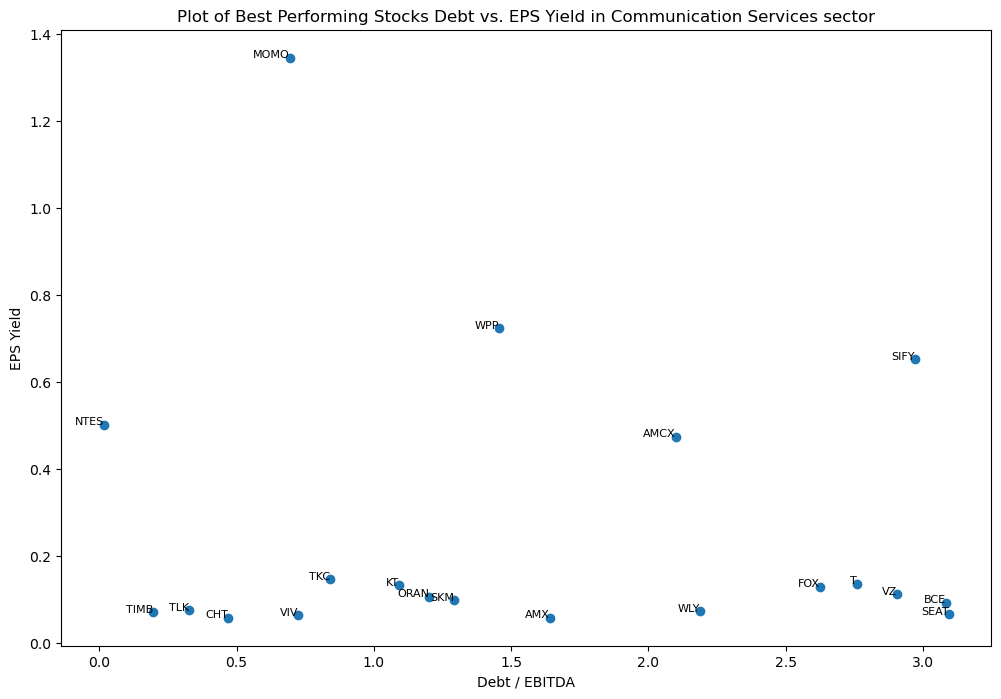

In [7]:
import matplotlib.pyplot as plt
plt.figure(figsize=(12, 8))
plt.xlabel('Debt / EBITDA')
plt.ylabel('EPS Yield')
scatter = plt.scatter(final_selection['Debt'], final_selection['EPS Yield']) 

for i, row in final_selection.iterrows():
    plt.text(row['Debt'], row['EPS Yield'], row['Code'], fontsize=8, ha='right')

sector_title = f'{sector} sector'
plt.title('Plot of Best Performing Stocks Debt vs. EPS Yield in ' + sector_title)
plt.savefig('Best_Debt_EPS_fixed.png')
plt.show()

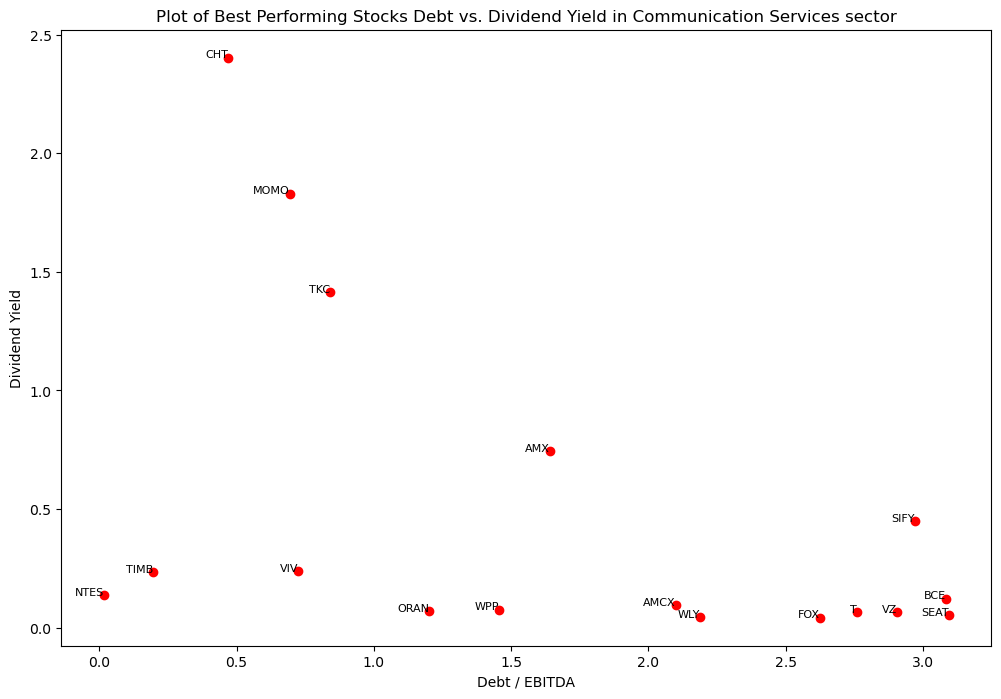

In [8]:
plt.figure(figsize=(12, 8))
plt.xlabel('Debt / EBITDA')
plt.ylabel('Dividend Yield')
excluded_codes = ['TLK', 'SKM', 'KT']
plot_data_1 = final_selection[~final_selection['Code'].isin(excluded_codes)]

scatter = plt.scatter(plot_data_1['Debt'], plot_data_1['Dividend Yield'], c='r') 

for i, row in plot_data_1.iterrows():
    plt.text(row['Debt'], row['Dividend Yield'], row['Code'], fontsize=8, ha='right')

plt.title('Plot of Best Performing Stocks Debt vs. Dividend Yield in ' + sector_title)
plt.savefig('Best_Debt_Div_fixed.png')
plt.show()

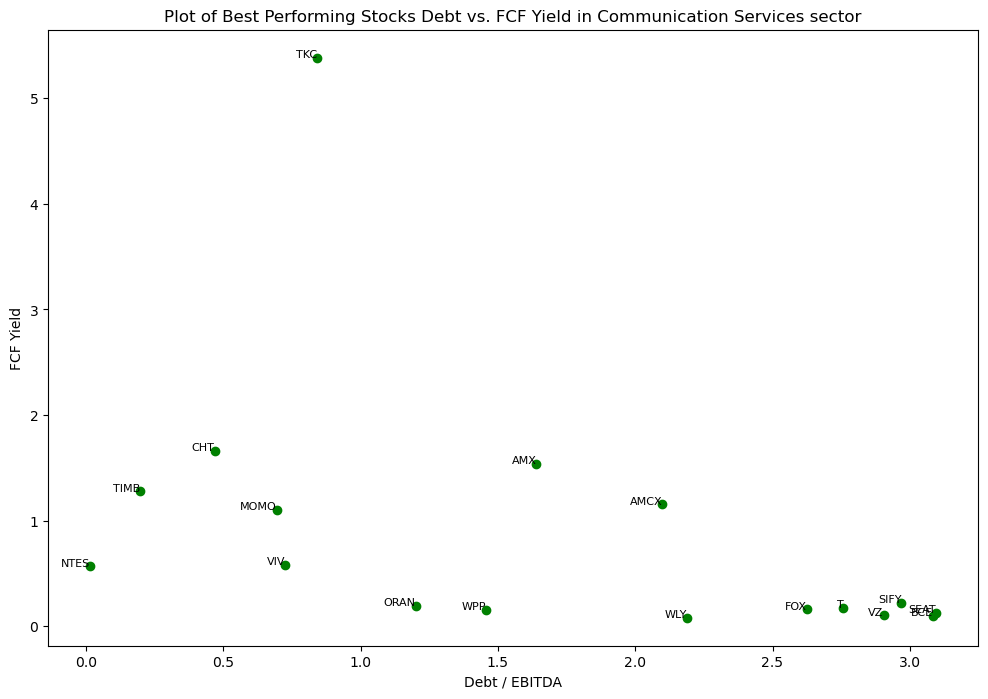

In [9]:
plt.figure(figsize=(12, 8))
plt.xlabel('Debt / EBITDA')
plt.ylabel('FCF Yield')
scatter = plt.scatter(plot_data_1['Debt'], plot_data_1['FCF'], c='g') 

for i, row in plot_data_1.iterrows():
    plt.text(row['Debt'], row['FCF'], row['Code'], fontsize=8, ha='right')

plt.title('Plot of Best Performing Stocks Debt vs. FCF Yield in ' + sector_title)
plt.savefig('Best_Debt_FCF_fixed.png')
plt.show()

In [10]:
today = '2024-06-03'
days_60 = '2024-04-04'
days_120 = '2024-02-05'
days_year = '2023-06-05'
def get_returns(stock,date,index='.US'):
    code = stock['General']['Code']
    price = float(api.get_eod_historical_stock_market_data(symbol=code + index, from_date=date, to_date=date)[0]['adjusted_close'])
    price_today = float(api.get_eod_historical_stock_market_data(symbol=code + index, from_date=today, to_date=today)[0]['adjusted_close'])
    returns = (price_today - price) / price
    return returns

In [11]:
def get_all_returns(stock,index='.US'):
    stock_returns = []
    stock_returns.append(get_returns(stock, days_60, index))
    stock_returns.append(get_returns(stock, days_120, index))
    stock_returns.append(get_returns(stock, days_year,index))
    return stock_returns

In [12]:
stocks_Best = []
for index, row in final_selection.iterrows():
    code = row['Code']
    print(code)
    stock = api.get_fundamentals_data(code)
    stocks_Best.append(stock)


NTES
TIMB
TLK
CHT
MOMO
VIV
TKC
KT
ORAN
SKM
WPP
AMX
AMCX
WLY
SIFY
BCE
T
FOX
VZ
SEAT


In [13]:
all_returns = []
for stock in stocks_Best:
    all_returns.append(get_all_returns(stock))


In [14]:
GSPC_returns = []

price_60 = float(api.get_eod_historical_stock_market_data(symbol='GSPC.INDX', from_date=days_60, to_date=days_60)[0]['adjusted_close'])
price_today = float(api.get_eod_historical_stock_market_data(symbol='GSPC.INDX', from_date=today, to_date=today)[0]['adjusted_close'])
price_120 = float(api.get_eod_historical_stock_market_data(symbol='GSPC.INDX', from_date=days_120, to_date=days_120)[0]['adjusted_close'])
price_year = float(api.get_eod_historical_stock_market_data(symbol='GSPC.INDX', from_date=days_year, to_date=days_year)[0]['adjusted_close'])
GSPC_returns.append((price_today - price_60) / price_60)
GSPC_returns.append((price_today - price_120) / price_120)
GSPC_returns.append((price_today - price_year) / price_year)
print(GSPC_returns)

[0.026458974862109824, 0.0689061066699691, 0.2362329220668307]


In [15]:
all_returns.append(GSPC_returns)

In [16]:
code_list = []
for stock in stocks_Best:
    code_list.append(stock['General']['Code'])
code_list.append('GSPC')

In [17]:
df_returns = pd.DataFrame(all_returns, columns=['60 Days', '120 Days', '1 Year'])
df_returns.insert(0, 'Code', code_list)
filename = f'returns_{sector}.csv'
df_returns.to_csv(filename, index=False)

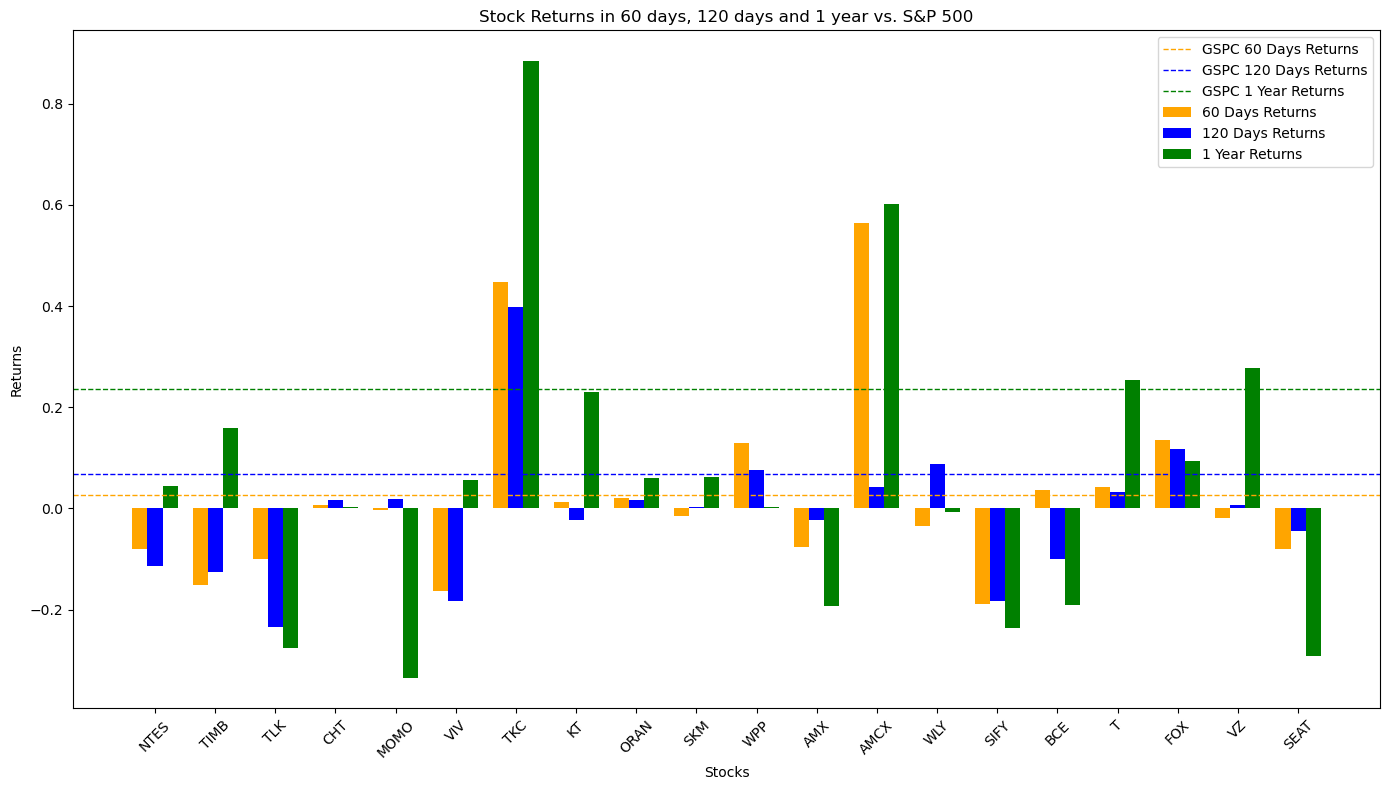

In [18]:
import numpy as np
import matplotlib.pyplot  as plt

plot_data = df_returns.iloc[:-1]

bar_width = 0.25  
index = np.arange(len(plot_data['Code'])) 

fig, ax = plt.subplots(figsize=(14, 8))

rects1 = ax.bar(index - bar_width, plot_data['60 Days'], bar_width, label='60 Days Returns', color = 'orange')
rects2 = ax.bar(index, plot_data['120 Days'], bar_width, label='120 Days Returns', color = 'blue')
rects3 = ax.bar(index + bar_width, plot_data['1 Year'], bar_width, label='1 Year Returns', color = 'green')

ax.axhline(y=GSPC_returns[0], color='orange', linestyle='--', linewidth=1, label='GSPC 60 Days Returns')
ax.axhline(y=GSPC_returns[1], color='blue', linestyle='--', linewidth=1, label='GSPC 120 Days Returns')
ax.axhline(y=GSPC_returns[2], color='green', linestyle='--', linewidth=1, label='GSPC 1 Year Returns')

ax.set_xlabel('Stocks')
ax.set_ylabel('Returns')
ax.set_title('Stock Returns in 60 days, 120 days and 1 year vs. S&P 500')
ax.set_xticks(index)
ax.set_xticklabels(plot_data['Code'], rotation=45) 
ax.legend() 

plt.tight_layout() 
plt.savefig('Returns.png')
plt.show()

In [20]:
benefit_60_days = np.sum(plot_data['60 Days'])/20
benefit_120_days = np.sum(plot_data['120 Days'])/20
benefit_1_year = np.sum(plot_data['1 Year'])/20
benefit_GPSC_60 = GSPC_returns[0]
benefit_GPSC_120 = GSPC_returns[1]
benefit_GPSC_1_Y = GSPC_returns[2]
print(f"Return for Investing in Best-Stocks Portfolios in 60 days is {benefit_60_days * 100:.2f}%")
print(f"Return for Investing in S&P500 in 60 days is {benefit_GPSC_60 * 100:.2f}%")
print(f"Return for Investing in Best-Stocks Portfolios in 120 days is {benefit_120_days * 100:.2f}%")
print(f"Return for Investing in S&P500 in 120 days is {benefit_GPSC_120 * 100:.2f}%")
print(f"Return for Investing in Best-Stocks Portfolios in 1 year is {benefit_1_year * 100:.2f}%")
print(f"Return for Investing in S&P500 in 1 year is {benefit_GPSC_1_Y * 100:.2f}%")

Return for Investing in Best-Stocks Portfolios in 60 days is 2.40%
Return for Investing in S&P500 in 60 days is 2.65%
Return for Investing in Best-Stocks Portfolios in 120 days is -1.09%
Return for Investing in S&P500 in 120 days is 6.89%
Return for Investing in Best-Stocks Portfolios in 1 year is 5.98%
Return for Investing in S&P500 in 1 year is 23.62%


In [7]:
GSPC_List = pd.read_csv('../GSPC.csv')
date_list = GSPC_List['Date']
GSPC_returns = GSPC_List['Returns']
code_list = final_selection['Code']
print(code_list)

2     NTES
9     TIMB
11     TLK
14     CHT
18    MOMO
20     VIV
22     TKC
25      KT
28    ORAN
29     SKM
30     WPP
35     AMX
39    AMCX
42     WLY
59    SIFY
73     BCE
82       T
83     FOX
86      VZ
97    SEAT
Name: Code, dtype: object


In [8]:
error_list = []
def get_price_list(stock, time_list, initial_price):
    price_list = []
    for date in time_list:
        try: 
            price = float(api.get_eod_historical_stock_market_data(symbol = stock, from_date = date, to_date= date)[0]['adjusted_close'])
            returns = (price - initial_price) / initial_price
            price_list.append([date, price,returns])
        except Exception as e:
            error_list.append([stock, date])
            price_list.append([date, 0, 0])
            print(f'{stock} on {date} error :{e}')
            continue
    return price_list

all_profolio = []
for s in code_list:
    initial_price = float(api.get_eod_historical_stock_market_data(symbol= s, from_date = date_list[0], to_date = date_list[0])[0]['adjusted_close'])
    stock_performance = get_price_list(s, date_list, initial_price)
    returns = [sublist[2] for sublist in stock_performance]
    all_profolio.append(returns)

print(len(all_profolio))

20


In [9]:
import numpy as np
n = len(date_list)
sum = np.zeros(n) 
for i in all_profolio:
    returns = np.array(i)
    sum += returns
total = sum / len(all_profolio)
print(total)

[ 0.          0.02564888  0.00514632  0.01212948  0.04908545  0.02587795
  0.08471776  0.04947878  0.07161596  0.04813815  0.04160576  0.01670403
  0.03640755  0.01663579  0.01320862  0.01330211 -0.00751701 -0.02030717
 -0.01515371 -0.01654333 -0.04810851 -0.04167161  0.01383981  0.0092001
  0.05132894  0.05197626  0.06942238  0.06367088  0.0819984   0.07301794
  0.07801583  0.07561189  0.05954053  0.06291349  0.07936181  0.06680286
  0.06760168  0.0629562   0.05378414  0.04486598  0.05105794  0.03705296
  0.03414195  0.03680049  0.03646511 -0.00715681  0.01068599  0.02320495
  0.04797018  0.05364662  0.0707744   0.06396184  0.05980693]


In [10]:
import json
listofcodes = code_list.tolist()
all_returns_dict = {listofcodes[i]: all_profolio[i] for i in range(len(all_profolio))}
all_returns_dict['Average'] = total.tolist()

with open('returns.json', 'w') as json_file:
    json.dump(all_returns_dict, json_file, indent=4)

In [12]:
import pandas as pd

df = pd.read_json('returns.json')
total = df['Average']
sector_title = sector + ' Sector'
std = np.std(total)
print(f'Standard Deviation of {sector_title} is: ', std)

Standard Deviation of Communication Services Sector is:  0.03222820487265456


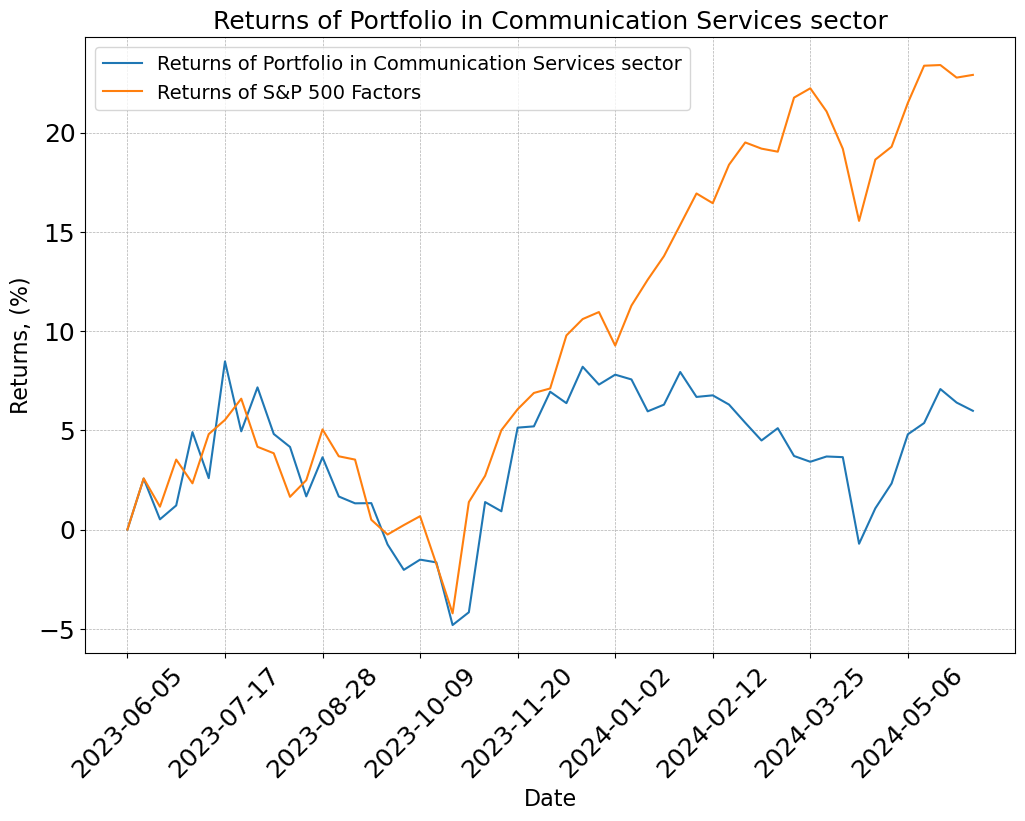

In [13]:
import matplotlib.pyplot as plt
weeks = range(len(date_list))
sector_title = f'{sector} sector'
plt.figure(figsize=(12, 8))
plt.xlabel('Date',fontsize=16)
plt.ylabel('Returns, (%)',fontsize=16)
plt.tick_params(axis='both', which='major', labelsize=18)
plt.grid(which='both', linestyle='--', linewidth=0.5)


plt.plot(date_list, total * 100, label = f'Returns of Portfolio in {sector_title}')
plt.plot(date_list, GSPC_returns*100, label = f'Returns of S&P 500 Factors')
plt.legend(fontsize=14)
plt.title('Returns of Portfolio in ' + sector_title , fontsize=18)

interval = 6 
plt.xticks(ticks=date_list[::interval], labels=date_list[::interval], rotation=45)
plt.savefig('Portfolio_Returns', bbox_inches='tight')
plt.show()